In [1]:
import os
import random

In [2]:
from google.cloud import vision
from google.oauth2 import service_account

In [3]:
from IPython.display import Image
import matplotlib.pyplot as plt
from matplotlib.image import imread
import io

In [4]:
creds = service_account.Credentials.from_service_account_file('./credentials.json')

In [5]:
client = vision.ImageAnnotatorClient(credentials=creds)

In [6]:
path = './data/tym11'

In [7]:
def get_labels(image):
    with io.open(image, 'rb') as image_file:
        content = image_file.read()
    image = vision.Image(content = content)
    labels = client.label_detection(image=image).label_annotations
    return labels

In [8]:
labels_images = {}

In [9]:
directories = os.listdir(path)

In [10]:
directories

['102500.jpg',
 '102600.jpg',
 '103001.jpg',
 '108500.jpg',
 '110301.jpg',
 '117000.jpg',
 '117100.jpg',
 '117200.jpg',
 '117302.jpg',
 '117501.jpg',
 '117801.jpg',
 '118200.jpg',
 '119001.jpg',
 '125201.jpg',
 '125501.jpg']

In [11]:
for i in directories:
    lbls = get_labels(os.path.join(path, i))
    lbl_set = list(set([i.description for i in lbls]))
    labels_images[os.path.join(path, i)] = lbl_set

In [12]:
print(labels_images)

{'./data/tym11\\102500.jpg': ['Natural environment', 'Bridge', 'Plant community', 'Vegetation', 'Nature reserve', 'Jungle', 'Forest', 'Terrestrial plant', 'Ecoregion', 'Old-growth forest'], './data/tym11\\102600.jpg': ['Natural environment', 'Plant community', 'Trail', 'Vegetation', 'Nature reserve', 'Branch', 'Forest', 'Terrestrial plant', 'Biome', 'Shrub'], './data/tym11\\103001.jpg': ['Architecture', 'Byzantine architecture', 'Landmark', 'Stupa', 'Roof', 'Finial', 'Dome', 'Holy places', 'Place of worship'], './data/tym11\\108500.jpg': ['Memorial', 'Arecales', 'Palm tree', 'Concrete', 'Creative arts', 'Carving', 'Sculpture', 'Statue', 'Stone carving', 'Monument'], './data/tym11\\110301.jpg': ['Cannon', 'Bird', 'Boats and boating--Equipment and supplies', 'Boat'], './data/tym11\\117000.jpg': ['City', 'Road surface', 'Public space', 'Curb', 'Neighbourhood', 'Woody plant', 'Street', 'Tower block', 'Road', 'Building'], './data/tym11\\117100.jpg': ['Mosque', 'Historic site', 'Byzantine ar

In [13]:
print(labels_images['./data/tym11\\102500.jpg'])


['Natural environment', 'Bridge', 'Plant community', 'Vegetation', 'Nature reserve', 'Jungle', 'Forest', 'Terrestrial plant', 'Ecoregion', 'Old-growth forest']


In [14]:
tags = {}
for k, v in labels_images.items():
    for j in v:
        pocet = tags.get(j, [0, []])[0] + 1
        seznam = tags.get(j, [0, []])[1]
        seznam.append(k)
        tags[j] = [pocet, seznam]

In [15]:
sort_tabs = sorted(tags.items(), key = lambda x: x[1], reverse = True)

In [16]:
tags['Ancient history']

[3,
 ['./data/tym11\\117501.jpg',
  './data/tym11\\117801.jpg',
  './data/tym11\\118200.jpg']]

In [17]:
print(sort_tabs[0])

('Ancient history', [3, ['./data/tym11\\117501.jpg', './data/tym11\\117801.jpg', './data/tym11\\118200.jpg']])


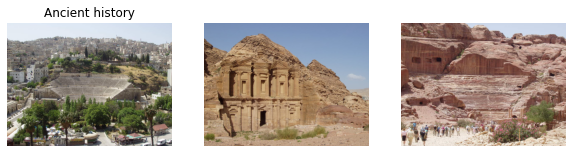

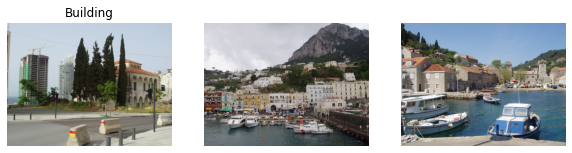

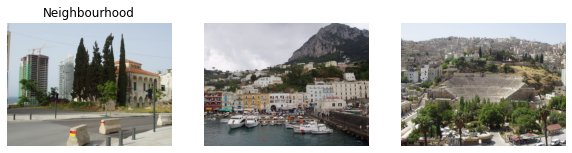

In [18]:
for k in range(3):
    pocet = sort_tabs[k][1][0]
    f, ax = plt.subplots(1, pocet, figsize = (10, 10))
    ax[0].set_title(sort_tabs[k][0])

    for i in range(pocet):
        ax[i].imshow(imread(sort_tabs[k][1][1][i]))
        ax[i].axis('off')

    plt.show()

Co byste chtěl(a) spatřit?Ancient history


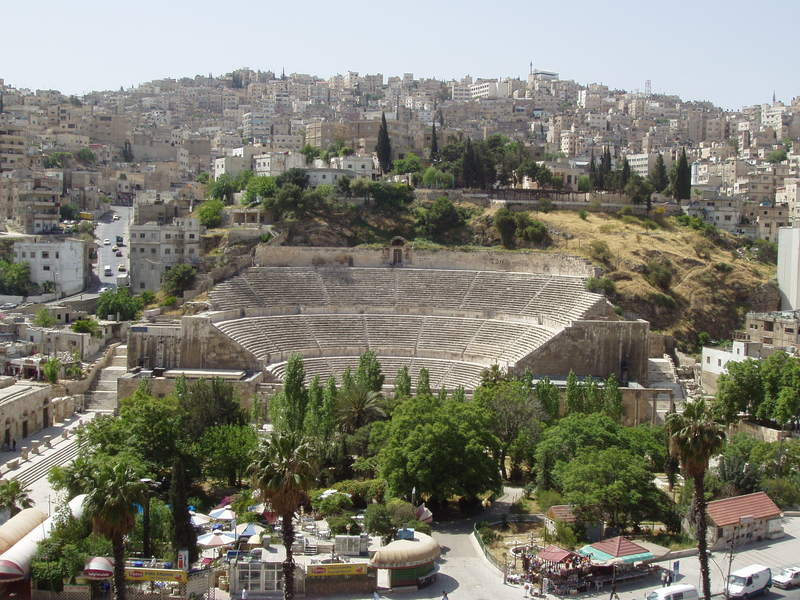

In [20]:
from random import randint
l = []
vstup = str(input('Co byste chtěl(a) spatřit?'))
for i,j in sort_tabs:
    pocet = tags[vstup][0]
    if i == vstup:
    
        for a in range(pocet):
            adresa = j[1][a]
            l.append(adresa)

    else:
        next
Image(l[random.randint(0,len(l))])